In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Lesson 3 Challenge starts at "HERE"

### Let's build a Naïve-Bayes model using a sample of Yelp reviews.

In [2]:
# Read yelp reviews txt file
reviews = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
reviews.columns = ['review', 'favorable']
reviews.head()

,review,favorable
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### I am going to see if certain good words and bad words are reliable predictors of reviews. I am going to start by defining two different dictionaries to analyze the reviews in the dataset.

In [117]:
# Build features by looking for reviews that contain certain words
good_words = []
bad_words = []

# Words indicative of each review category
good_words = ['loved', 'was good', 'great', 'recommended', 'beautiful', 'friendly', 'delight', 'amazing', 'awesome', 'excellent', 'will return']
bad_words = ['not good', 'nasty', 'angry', 'overpriced', 'disgusted', 'slow', 'sick', 'suck', 'bad', 'disappointing', 'gross', 'rude']

# Function to select review to be favorable or unfavorable
def feature_selector(df, feature_dict):
    
    for word in feature_dict:
        df[str(word)] = (df.review.str.contains(' ' + str(word) + ' ', case=False))
    
    return

# Run function with each dictionary
feature_selector(reviews, good_words)
feature_selector(reviews, bad_words)


#### Let's modify the 'favorable' column into Boolean from numeric values (0 or 1).

In [4]:
# Change the 'favorable' column into Boolean
reviews['favorable'] = (reviews['favorable'] == 1)
reviews.head()

,review,favorable,loved,was good,great,recommended,beautiful,friendly,delight,amazing,...,angry,overpriced,disgusted,slow,sick,suck,bad,disappointing,gross,rude
0,Wow... Loved this place.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


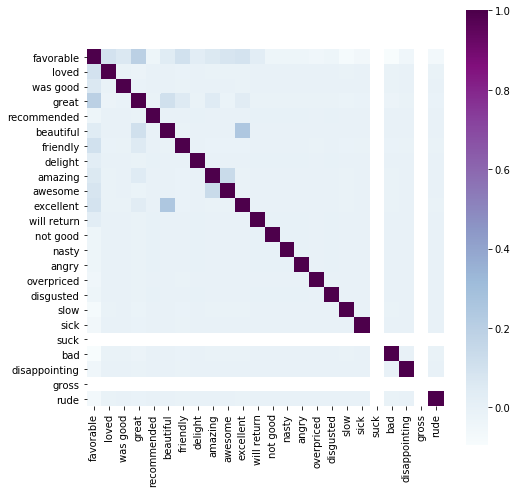

In [5]:
# Plot heatmap of correlation coefficients between features
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(reviews.corr(), cmap="BuPu", square=True)

#### The heatmap shows each feature independence. 'Gross'-'sick', and 'excelllent'-'beautiful' pairs show higher than average correlation. 

In [6]:
# We need to specify the outcomes(target) and input(data)
yelp_target = reviews['favorable']
yelp_data_1 = reviews[good_words + bad_words]


In [21]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(yelp_data_1, yelp_target)

# Classify, storing the result in a new variable.
y_pred_yelp_1 = bnb.predict(yelp_data_1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    yelp_data_1.shape[0],
    (yelp_target != y_pred_yelp_1).sum()
))

Number of mislabeled points out of a total 1000 points : 417


#### This model was incorrect 417 times, meaning a model accuracy of 58.3%  Now I want to apply the same model to another survey to see how it translates, if at all. 

In [8]:
# Let's first read the imdb dataset
imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None)

# Name columns
imdb.columns = ['review', 'favorable']

# Change favorable column into Boolean
imdb['favorable'] = (imdb['favorable'] == 1)

imdb.head()

,review,favorable
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


In [9]:
# Run function with each dictionary
feature_selector(imdb, good_words)
feature_selector(imdb, bad_words)

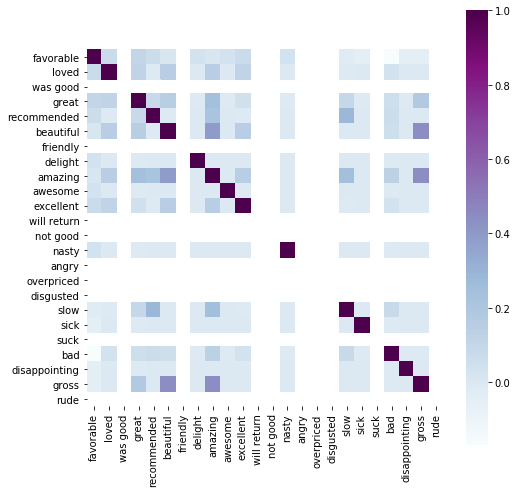

In [10]:
# Plot heatmap of correlation coefficients between features
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(imdb.corr(), cmap="BuPu", square=True)

#### This doesn't look too promising as there are several words that don't appear in the dataset.

In [11]:
# We need to specify the outcomes(target) and input(data)
imdb_target = imdb['favorable']
imdb_data_1 = imdb[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(imdb_data_1, imdb_target)

# Classify, storing the result in a new variable.
y_pred_imdb_1 = bnb.predict(imdb_data_1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb_data_1.shape[0],
    (imdb_target != y_pred_imdb_1).sum()
))

Number of mislabeled points out of a total 748 points : 332


#### We got 332 out of 748 wrong, so the accuracy is only 55.6%

#### Let's trying adding a few more words to see if we can improve this figure and check back to see if it help the Yelp dataset.

In [118]:
good_words.extend(['hilarious', 'enjoyed', 'terrific', 'fresh', '10/10', 'two thumbs up'])
bad_words.extend(['aimless', 'lost', 'poor','wasted', 'low budget', 'predictable', 'lazy'])

####  First IMDB:

In [13]:
feature_selector(imdb, good_words)
feature_selector(imdb, bad_words)

# We need to specify the outcomes(target) and input(data)
imdb_target = imdb['favorable']
imdb_data_2 = imdb[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(imdb_data_2, imdb_target)

# Classify, storing the result in a new variable.
y_pred_imdb_2 = bnb.predict(imdb_data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb_data_2.shape[0],
    (imdb_target != y_pred_imdb_2).sum()
))

Number of mislabeled points out of a total 748 points : 317


####  Added words were marginally better at 58.4%

####  Let's try it on Yelp:

In [14]:
feature_selector(reviews, good_words)
feature_selector(reviews, bad_words)

# We need to specify the outcomes(target) and input(data)
yelp_target = reviews['favorable']
yelp_data_2 = reviews[good_words + bad_words]

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(yelp_data_2, yelp_target)

# Classify, storing the result in a new variable.
y_pred_yelp_2 = bnb.predict(yelp_data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    yelp_data_2.shape[0],
    (yelp_target != y_pred_yelp_2).sum()
))

Number of mislabeled points out of a total 1000 points : 405


#### That actually made it slightly better, increasing the accuracy to 59.5% from 58.3% The deltas for the two datasets after adding to the dictionary using the IMDB reviews were a increase of 1.2% for Yelp and an increase of 3.2% for IMDB.

# HERE 

### Let's start by creating the confusion matrix.

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# For Yelp Model
cvs_yelp_1 = cross_val_score(bnb, yelp_data_1, yelp_target, cv=10)
print(cvs_yelp_1)
cm_yelp_1 = confusion_matrix(yelp_target, y_pred_yelp_1)
print(cm_yelp_1)

# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_yelp_1 = cm_yelp_1[0, 0]/sum(cm_yelp_1[0])
print('Sensitivity: ', sens_yelp_1)

spec_yelp_1 = cm_yelp_1[1,1]/sum(cm_yelp_1[1])
print('Specifity: ', spec_yelp_1)

[0.6  0.57 0.59 0.53 0.56 0.56 0.65 0.59 0.57 0.59]
[[497   3]
 [414  86]]
Sensitivity:  0.5455543358946213
Specifity:  0.172


#### The first set of features were very good at identifying positive reviews (99.4%), but it was woeful in detecting negative reviews (17.2%). There doesn't seem to be any overfitting since the cross validation scores are right around 58%. Now let's try to figure out which of the classifiers are most accurate and which can be discarded.

In [16]:
# Now the first IMDB Model
cvs_imdb_1 = cross_val_score(bnb, imdb_data_1, imdb_target, cv=10)
print(cvs_imdb_1)
cm_imdb_1 = confusion_matrix(imdb_target, y_pred_imdb_1)
print(cm_imdb_1)

# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_imdb_1 = cm_imdb_1[0, 0]/sum(cm_imdb_1[0])
print('Sensitivity: ', sens_imdb_1)

spec_imdb_1 = cm_imdb_1[1,1]/sum(cm_imdb_1[1])
print('Specifity: ', spec_imdb_1)

[0.52631579 0.53947368 0.54666667 0.57333333 0.56       0.57333333
 0.52702703 0.55405405 0.5        0.58108108]
[[ 34 328]
 [  4 382]]
Sensitivity:  0.09392265193370165
Specifity:  0.9896373056994818


#### Classifier used on the IMDB dataset shows the opposite trend: it identified positive reviews at only 9.3% while identifying negative reviews at 99.0%

In [17]:
# Let's see the numbers for the extended classfier on both datasets.

# For Yelp Model
cvs_yelp_2 = cross_val_score(bnb, yelp_data_2, yelp_target, cv=10)
print(cvs_yelp_2)
cm_yelp_2 = confusion_matrix(yelp_target, y_pred_yelp_2)
print(cm_yelp_2)

# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_yelp_2 = cm_yelp_2[0, 0]/sum(cm_yelp_2[0])
print('Sensitivity: ', sens_yelp_2)

spec_yelp_2 = cm_yelp_2[1,1]/sum(cm_yelp_2[1])
print('Specifity: ', spec_yelp_2)


[0.61 0.57 0.6  0.56 0.58 0.58 0.66 0.59 0.56 0.62]
[[496   4]
 [401  99]]
Sensitivity:  0.992
Specifity:  0.198


In [56]:
cvs_imdb_2 = cross_val_score(bnb, imdb_data_2, imdb_target, cv=10)
print(cvs_imdb_2)
cm_imdb_2 = confusion_matrix(imdb_target, y_pred_imdb_2)
print(cm_imdb_2)

# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_imdb_2 = cm_imdb_2[0, 0]/sum(cm_imdb_2[0])
print('Sensitivity: ', sens_imdb_2)

spec_imdb_2 = cm_imdb_2[1,1]/sum(cm_imdb_2[1])
print('Specifity: ', spec_imdb_2)

[0.55263158 0.53947368 0.54666667 0.57333333 0.62666667 0.56
 0.54054054 0.59459459 0.5        0.58108108]
[[ 49 313]
 [  4 382]]
Sensitivity:  0.13535911602209943
Specifity:  0.9896373056994818


In [19]:
# Let's create a dataframe to see the figures side by side
numbers = {'Test Set': ['Yelp', '', 'IMDB', ''], 
           'Measure': ['Sensitivity', 'Specificify', 'Sensitivity', 'Specificity'],
           'Class 1': [sens_yelp_1, spec_yelp_1, sens_imdb_1, spec_imdb_1],
           'Class 2': [sens_yelp_2, spec_yelp_2, sens_imdb_2, spec_imdb_2]
          }

df = pd.DataFrame(numbers)
df

,Test Set,Measure,Class 1,Class 2
0,Yelp,Sensitivity,0.994000,0.992000
1,,Specificify,0.172000,0.198000
2,IMDB,Sensitivity,0.093923,0.135359
3,,Specificity,0.989637,0.989637


#### Let's modify the classifiers to see if we can improve on these metrics. Since the Yelp reviews classifier has trouble predicting negative reviews, let's modify the 'bad_words' dictionary to see if we can improve the accuracy.

In [119]:
# Let's see again what our features are.
print(bad_words)

['not good', 'nasty', 'angry', 'overpriced', 'disgusted', 'slow', 'sick', 'suck', 'bad', 'disappointing', 'gross', 'rude', 'aimless', 'lost', 'poor', 'wasted', 'low budget', 'predictable', 'lazy']


In [120]:
# Let's first get rid of words that aren't useful
for word in bad_words:
    print(word + ': ' + str(len(reviews[reviews[word] == True])))

not good: 1
nasty: 1
angry: 1
overpriced: 2
disgusted: 1
slow: 6
sick: 3
suck: 0
bad: 9
disappointing: 2
gross: 0
rude: 4
aimless: 0
lost: 2
poor: 5
wasted: 1
low budget: 0
predictable: 0
lazy: 0


In [121]:
# Let's get rid of useless features (0s and 1s)
for word in bad_words:
    if len(reviews[reviews[word] == True]) < 2:
        bad_words.remove(word)        
        
for word in bad_words:
    print(word + ': ' + str(len(reviews[reviews[word] == True])))

nasty: 1
overpriced: 2
slow: 6
sick: 3
bad: 9
disappointing: 2
rude: 4
lost: 2
poor: 5
low budget: 0
lazy: 0


In [122]:
# Let's test the new 'bad_words' features set

# First implement new dictionary
feature_selector(reviews, bad_words)

# Create new test data
yelp_data_3 = reviews[good_words + bad_words]

# Fit our model to the data.
bnb.fit(yelp_data_3, yelp_target)

# Classify, storing the result in a new variable.
y_pred_yelp_3 = bnb.predict(yelp_data_3)

cvs_yelp_3 = cross_val_score(bnb, yelp_data_3, yelp_target, cv=10)
print(cvs_yelp_3)
cm_yelp_3 = confusion_matrix(yelp_target, y_pred_yelp_3)
print(cm_yelp_3)

[0.61 0.57 0.6  0.56 0.58 0.58 0.66 0.59 0.56 0.62]
[[496   4]
 [401  99]]


In [124]:
# Now to add new features
bad_words.extend(['won\'t', 'not', 'waited', 'disappointed', 'never'])
print(bad_words)

['nasty', 'overpriced', 'slow', 'sick', 'bad', 'disappointing', 'rude', 'lost', 'poor', 'low budget', 'lazy', "won't", 'not', 'waited', 'disappointed', 'never']


In [125]:
# Rinse and Repeat
# First implement new dictionary
feature_selector(reviews, bad_words)

# Create new test data
yelp_data_4 = reviews[good_words + bad_words]

# Fit our model to the data.
bnb.fit(yelp_data_4, yelp_target)

# Classify, storing the result in a new variable.
y_pred_yelp_4 = bnb.predict(yelp_data_4)

cvs_yelp_4 = cross_val_score(bnb, yelp_data_4, yelp_target, cv=10)
print(cvs_yelp_4)
cm_yelp_4 = confusion_matrix(yelp_target, y_pred_yelp_4)
print(cm_yelp_4)

[0.65 0.63 0.69 0.57 0.62 0.65 0.67 0.63 0.62 0.6 ]
[[158 342]
 [ 22 478]]


In [127]:
# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_yelp_4 = cm_yelp_4[0, 0]/sum(cm_yelp_4[0])
print('Sensitivity: ', sens_yelp_4)

spec_yelp_4 = cm_yelp_4[1,1]/sum(cm_yelp_4[1])
print('Specifity: ', spec_yelp_4)

Sensitivity:  0.316
Specifity:  0.956


#### So it looks like that worked a lot better for detecting unfavorable reviews at the cost of detecting positive reviews. Let's see if we can do something about that.

In [128]:
print(good_words)

['loved', 'was good', 'great', 'recommended', 'beautiful', 'friendly', 'delight', 'amazing', 'awesome', 'excellent', 'will return', 'hilarious', 'enjoyed', 'terrific', 'fresh', '10/10', 'two thumbs up']


In [155]:
for word in good_words:
    print(word + ': ' + str(len(reviews[reviews[word] == True])))
    


great: 38
beautiful: 2
friendly: 18
amazing: 7
awesome: 7
excellent: 8
hilarious: 0
enjoyed: 5
fresh: 9
two thumbs up: 0
best: 15
delicious: 4
favorite: 1
perfect: 7
happy: 8
love: 16
good: 56


In [130]:
for word in good_words:
    if len(reviews[reviews[word] == True]) < 2:
        good_words.remove(word)
        
print(good_words)

['loved', 'was good', 'great', 'beautiful', 'friendly', 'amazing', 'awesome', 'excellent', 'hilarious', 'enjoyed', 'fresh', 'two thumbs up']


In [147]:
# Now to add some new words
#good_words.extend(['best', 'delicious', 'favorite', 'perfect', 'happy'])

# And let's also change 'loved' to 'love' and 'was good' to 'good'
#good_words.remove('loved')
#good_words.remove('was good')
good_words.extend(['love', 'good'])


In [148]:
print(good_words)

['great', 'beautiful', 'friendly', 'amazing', 'awesome', 'excellent', 'hilarious', 'enjoyed', 'fresh', 'two thumbs up', 'best', 'delicious', 'favorite', 'perfect', 'happy', 'love', 'good']


In [149]:
# First implement new dictionary
feature_selector(reviews, good_words)

# Create new test data
yelp_data_5 = reviews[good_words + bad_words]

# Fit our model to the data.
bnb.fit(yelp_data_5, yelp_target)

# Classify, storing the result in a new variable.
y_pred_yelp_5 = bnb.predict(yelp_data_5)

cvs_yelp_5 = cross_val_score(bnb, yelp_data_5, yelp_target, cv=10)
print(cvs_yelp_5)
cm_yelp_5 = confusion_matrix(yelp_target, y_pred_yelp_5)
print(cm_yelp_5)

[0.61 0.61 0.64 0.64 0.66 0.62 0.73 0.63 0.6  0.69]
[[486  14]
 [340 160]]


In [150]:
# Find the sensitivity (TPos/sum(TPos and FPos)) and specificity(TNeg/sum(TNeg and FNeg))
sens_yelp_5 = cm_yelp_5[0, 0]/sum(cm_yelp_5[0])
print('Sensitivity: ', sens_yelp_5)

spec_yelp_5 = cm_yelp_5[1,1]/sum(cm_yelp_5[1])
print('Specifity: ', spec_yelp_5)

Sensitivity:  0.972
Specifity:  0.32


#### Aaaand it swings back to the other side. But we are reducing the number of misclassified reviews from 414 on the first iteration, to 364, then to 354.